In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

In [2]:
# Save the cleaned data to a new CSV file named 'cleaned_weather_data.csv'
cleaned_file_path = 'cleaned_weather_data.csv'

df = pd.read_csv(cleaned_file_path)

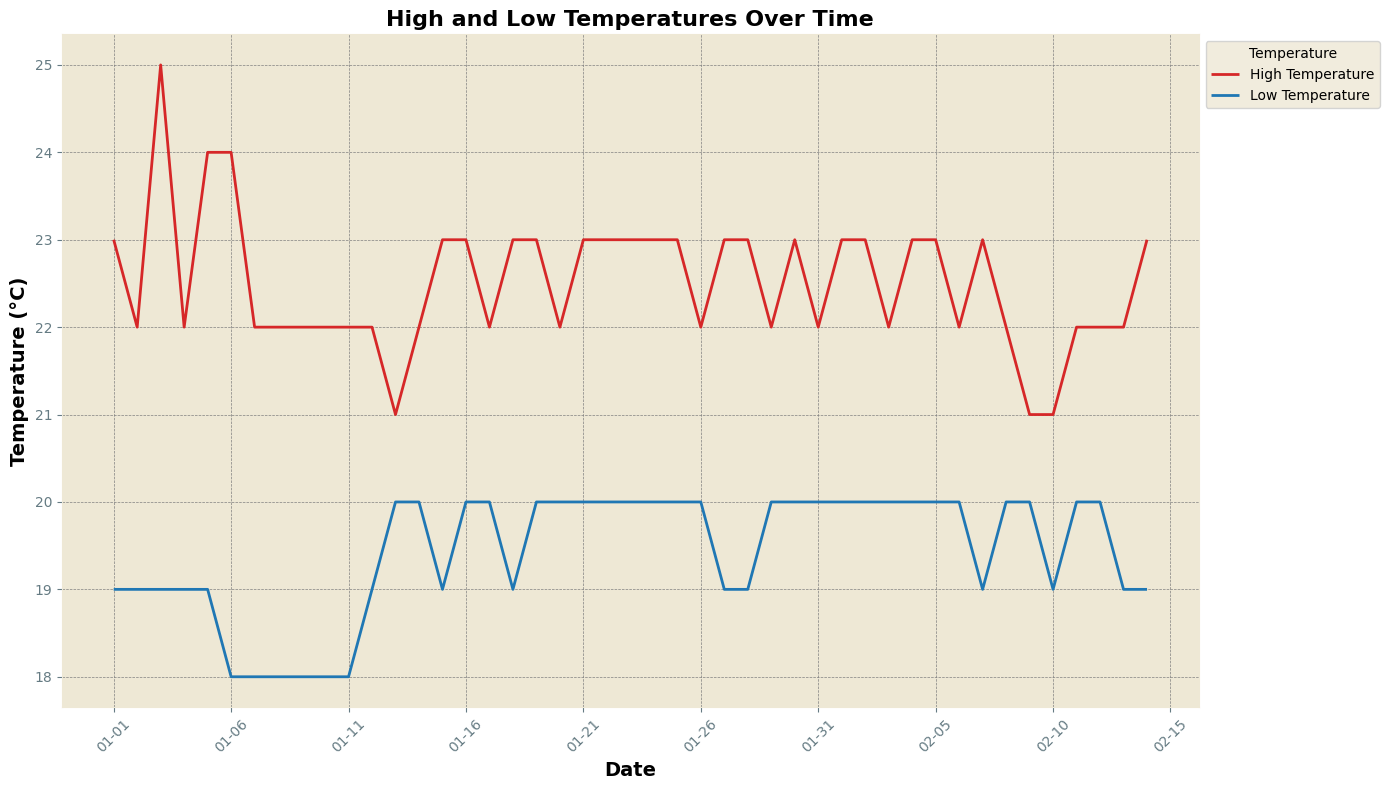

In [3]:
# This it the data visalization for Temperature over Time.
# Set the figure size. We will set it to 14 by 8 inches but it may be adjusted.
plt.figure(figsize=(14, 8)) 

# Style Configurations for better contrast
plt.style.use('Solarize_Light2')

# Plot data as a line chart. Customize plot data by color and line width
plt.plot(df['Date'], df['High Temperature'], color='tab:red', label='High Temperature', linewidth=2)
plt.plot(df['Date'], df['Low Temperature'], color='tab:blue', label='Low Temperature', linewidth=2)

# Customize labels and title with font size and weight
plt.xlabel('Date', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Temperature (°C)', fontsize=14, fontweight='bold', color='black')
plt.title('High and Low Temperatures Over Time', fontsize=16, fontweight='bold', color='black')

# Format the x-axis with date formatting and major ticks every n days where n = 5. 
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xticks(rotation=45)

# Legend Configurations
plt.legend(title='Temperature', loc='upper left', bbox_to_anchor=(1, 1))

# Grid Configurations
plt.grid(True, linestyle='--', color='grey', linewidth=0.5)

plt.tight_layout()
plt.show()

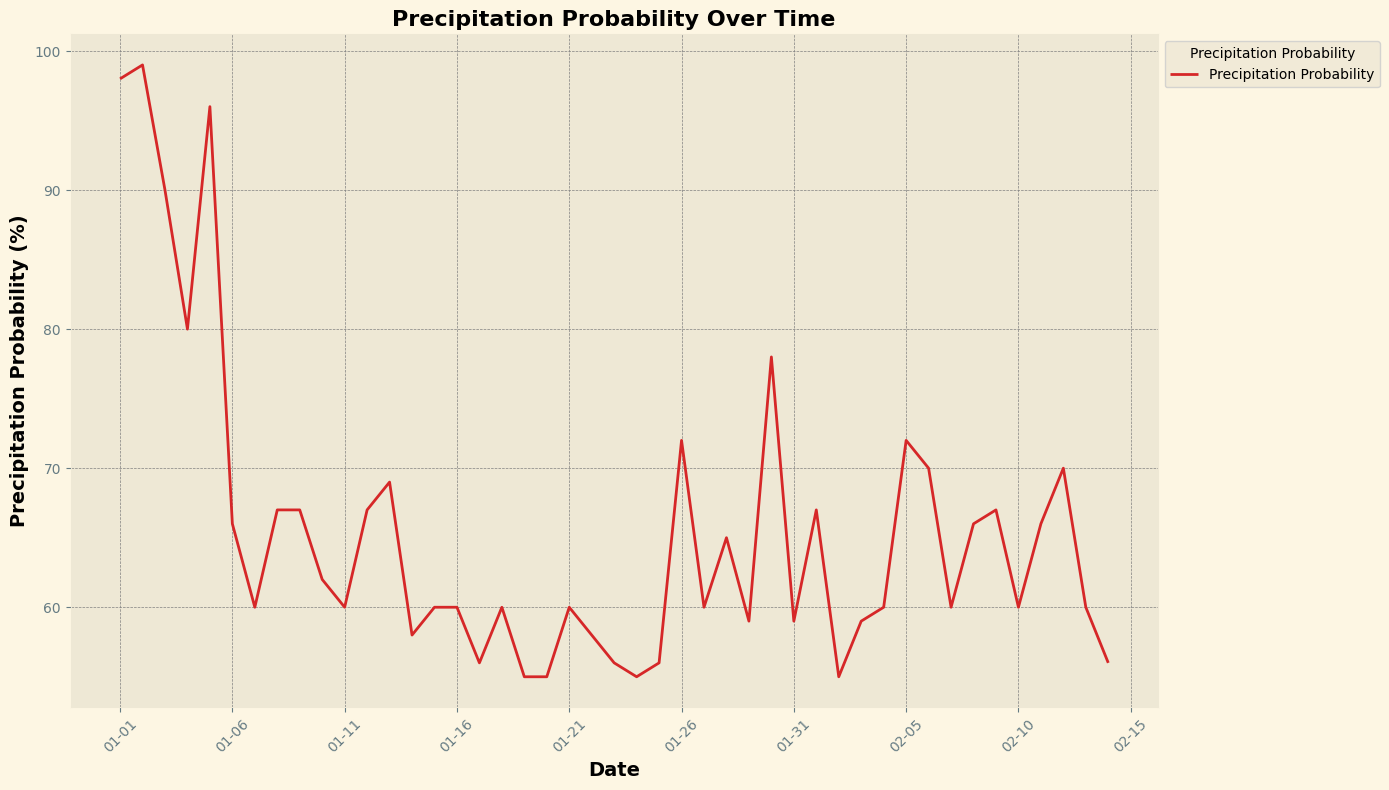

In [4]:
# This it the data visalization for Precipitation Probability over Time.
# Set the figure size. We will set it to 14 by 8 inches but it may be adjusted.
plt.figure(figsize=(14, 8)) 

# Style Configurations for better contrast
plt.style.use('Solarize_Light2')

# Plot data as a line chart. Customize plot data by color and line width
plt.plot(df['Date'], df['Precipitation Probability'], color='tab:red', label='Precipitation Probability', linewidth=2)

# Customize labels and title with font size and weight
plt.xlabel('Date', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Precipitation Probability (%)', fontsize=14, fontweight='bold', color='black')
plt.title('Precipitation Probability Over Time', fontsize=16, fontweight='bold', color='black')

# Format the x-axis with date formatting and major ticks every n days where n = 5. 
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xticks(rotation=45)

# Legend Configurations
plt.legend(title='Precipitation Probability', loc='upper left', bbox_to_anchor=(1, 1))

# Grid Configurations
plt.grid(True, linestyle='--', color='grey', linewidth=0.5)

plt.tight_layout()
plt.show()

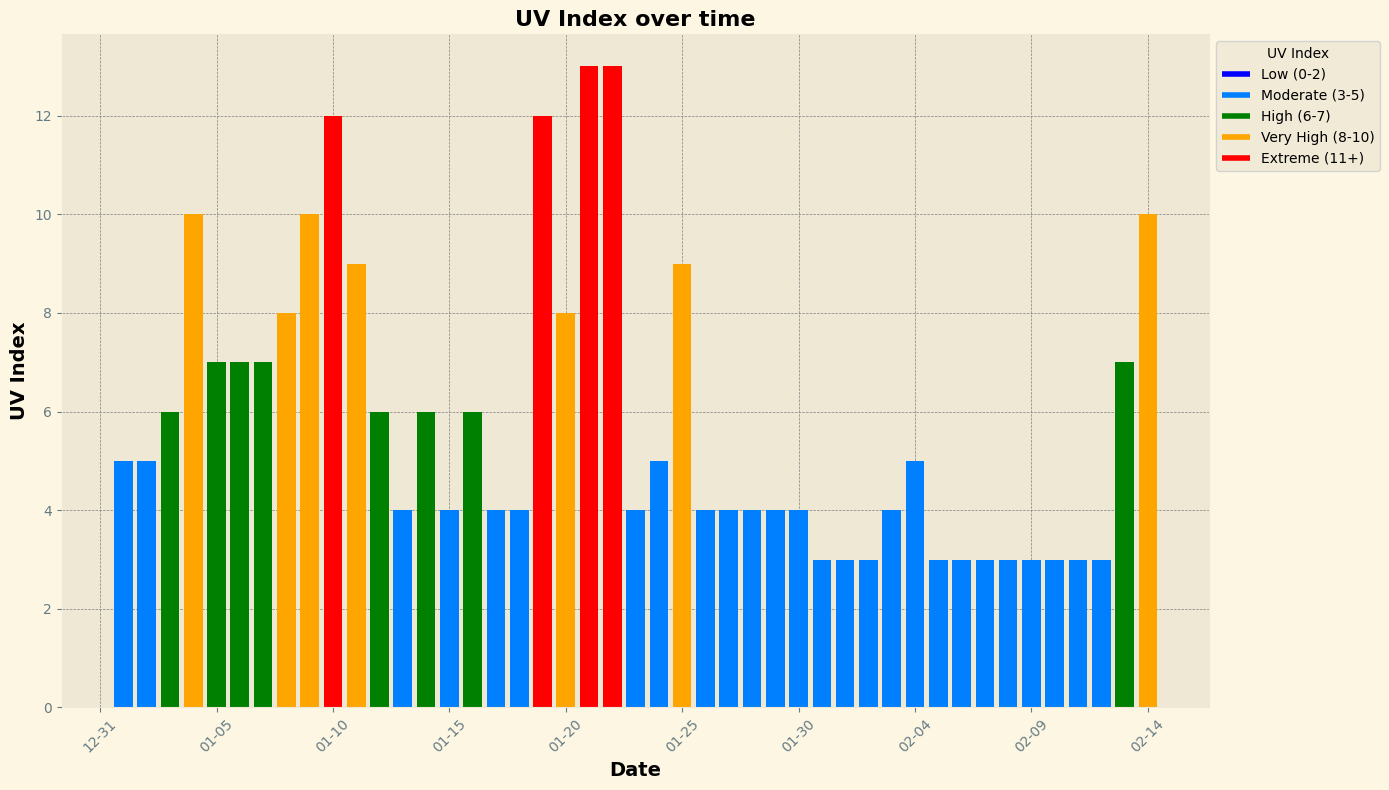

In [5]:
# This is the data visualization for UV Index over Time. 
# Assign colors based on the UV Index value. This information is based on the UV Index scale of WHO.
def uv_color(uv_index):
    if uv_index <= 2:
        return 'blue'
    elif uv_index <= 5:
        return '#007FFF'
    elif uv_index <= 7:
        return 'green'
    elif uv_index <= 10:
        return 'orange'
    else:
        return 'red'

colors = df['UV Index'].apply(uv_color)

# Set the figure size. We will set it to 14 by 8 inches but it may be adjusted.
plt.figure(figsize=(14, 8))

# We will use a bar chart. Customize plot data by color and line width.
plt.bar(df['Date'], df['UV Index'], color=colors, label='UV Index', linewidth=2)

# Labels and title configuration
plt.xlabel('Date', fontsize=14, fontweight='bold', color='black')
plt.ylabel('UV Index', fontsize=14, fontweight='bold', color='black')
plt.title('UV Index over time', fontsize=16, fontweight='bold', color='black')

# Format the x-axis with date formatting and major ticks every n days where n = 5. 
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend with a title and adjust its location with color black
legend_labels = {
    'blue': 'Low (0-2)',
    '#007FFF': 'Moderate (3-5)',
    'green': 'High (6-7)',
    'orange': 'Very High (8-10)',
    'red': 'Extreme (11+)'
}

# Legend Configurations
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in legend_labels]
plt.legend(handles, legend_labels.values(), title='UV Index', loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)

# Grid Configurations
plt.grid(True, linestyle='--', color='grey', linewidth=0.5)

plt.tight_layout()
plt.show()

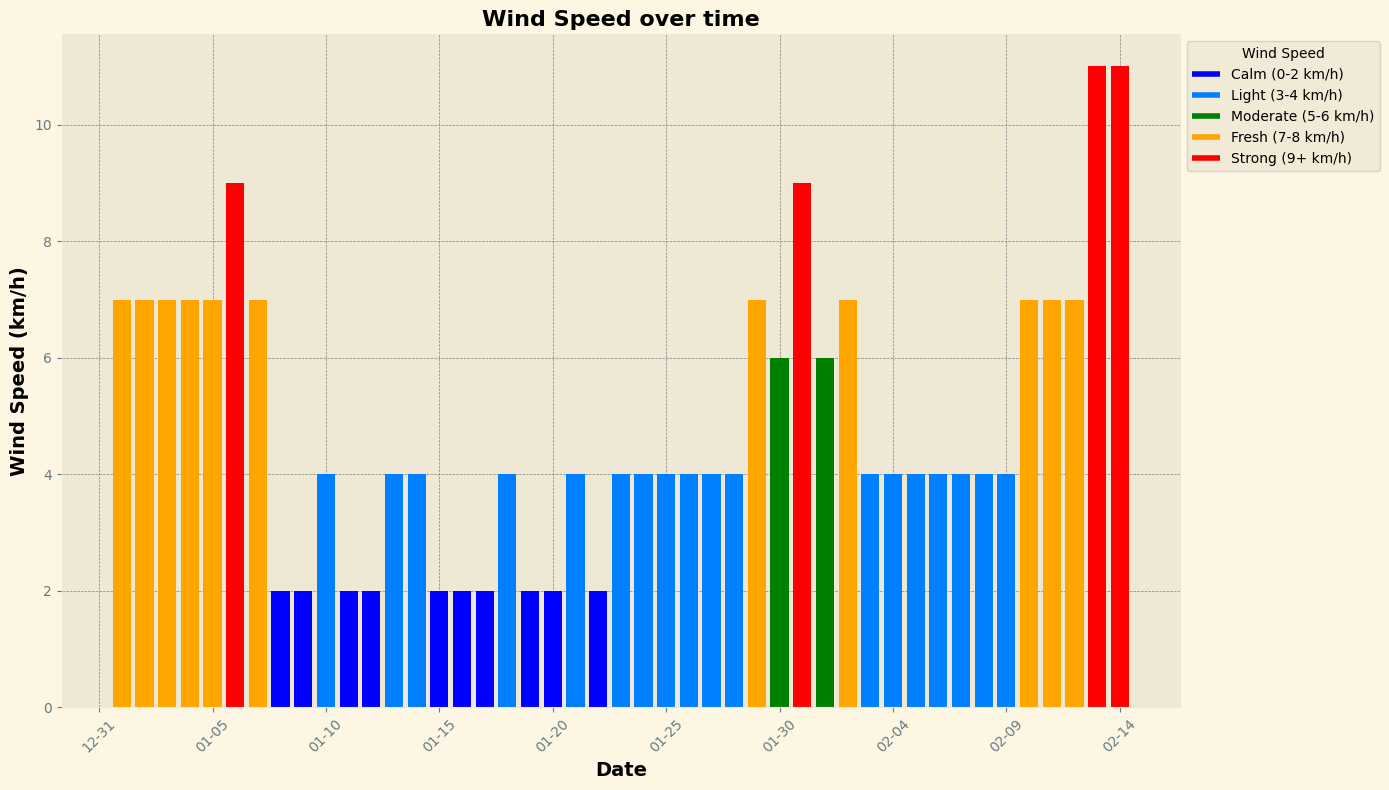

In [6]:
# This is the data visualization for Wind Speed over Time.
# Assign colors based on Wind Speed value.
def wind_speed_color(wind_speed):
    if wind_speed <= 2:
        return 'blue'  # Calm
    elif wind_speed <= 4:
        return '#007FFF'  # Light
    elif wind_speed <= 6:
        return 'green'  # Moderate
    elif wind_speed <= 8:
        return 'orange'  # Fresh
    else:
        return 'red'  # Strong

colors = df['Wind Speed'].apply(wind_speed_color)

# Set the figure size. We will set it to 14 by 8 inches but it may be adjusted.
plt.figure(figsize=(14, 8))

# Plot the data with the assigned colors
plt.bar(df['Date'], df['Wind Speed'], color=colors, label='Wind Speed', linewidth=2)

# Labels and title configuration
plt.xlabel('Date', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Wind Speed (km/h)', fontsize=14, fontweight='bold', color='black')
plt.title('Wind Speed over time', fontsize=16, fontweight='bold', color='black')

# Format the x-axis with date formatting and major ticks every n days where n = 5. 
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend with a title and adjust its location with color black
legend_labels = {
    'blue': 'Calm (0-2 km/h)',
    '#007FFF': 'Light (3-4 km/h)',
    'green': 'Moderate (5-6 km/h)',
    'orange': 'Fresh (7-8 km/h)',
    'red': 'Strong (9+ km/h)'
}

# Legend Configurations
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in legend_labels]
plt.legend(handles, legend_labels.values(), title='Wind Speed', loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)

# Grid Configurations
plt.grid(True, linestyle='--', color='grey', linewidth=0.5)

plt.tight_layout()
plt.show()

In [7]:
# Convert the 'Date' column to numeric
df['Date'] = pd.to_datetime(df['Date']).map(pd.Timestamp.toordinal)

# Collect the data to be used for correlation analysis
data = {
    'Date': df['Date'],
    'High Temperature': df['High Temperature'],
    'Low Temperature': df['Low Temperature'],
    'Precipitation Probability': df['Precipitation Probability'],
    'UV Index': df['UV Index'],
    'Wind Speed': df['Wind Speed']
}

df = pd.DataFrame(data)

# Calculate the correlation matrix
correlation_matrix = df.corr()

print(correlation_matrix)


                               Date  High Temperature  Low Temperature  \
Date                       1.000000         -0.228704         0.510041   
High Temperature          -0.228704          1.000000        -0.068389   
Low Temperature            0.510041         -0.068389         1.000000   
Precipitation Probability -0.429520          0.206431        -0.194889   
UV Index                  -0.418715          0.150372        -0.336821   
Wind Speed                 0.229548          0.119888        -0.108018   

                           Precipitation Probability  UV Index  Wind Speed  
Date                                       -0.429520 -0.418715    0.229548  
High Temperature                            0.206431  0.150372    0.119888  
Low Temperature                            -0.194889 -0.336821   -0.108018  
Precipitation Probability                   1.000000 -0.109610    0.272227  
UV Index                                   -0.109610  1.000000   -0.152625  
Wind Speed         

In [8]:
# Extract correlations and categorize them
positive_correlations = []
negative_correlations = []
seen_pairs = set()

for feature in correlation_matrix.columns:
    correlations = correlation_matrix[feature].drop(feature).sort_values(ascending=False)
    for target_feature, corr_value in correlations.items():
        # Create a sorted tuple of the feature pair to ensure uniqueness
        pair = tuple(sorted([feature, target_feature]))
        if pair not in seen_pairs:
            seen_pairs.add(pair)
            if corr_value > 0:
                positive_correlations.append((feature, target_feature, corr_value))
            elif corr_value < 0:
                negative_correlations.append((feature, target_feature, corr_value))

# Sort the lists by correlation value
positive_correlations_sorted = sorted(positive_correlations, key=lambda x: x[2], reverse=True)
negative_correlations_sorted = sorted(negative_correlations, key=lambda x: x[2])

# Print the sorted lists of correlations
print("\nPOSITIVE CORRELATIONS:")
for feature1, feature2, corr in positive_correlations_sorted:
    print(f"{feature1} and {feature2}: {corr:.2f}")

print("\nNEGATIVE CORRELATIONS:")
for feature1, feature2, corr in negative_correlations_sorted:
    print(f"{feature1} and {feature2}: {corr:.2f}")


POSITIVE CORRELATIONS:
Date and Low Temperature: 0.51
Precipitation Probability and Wind Speed: 0.27
Date and Wind Speed: 0.23
High Temperature and Precipitation Probability: 0.21
High Temperature and UV Index: 0.15
High Temperature and Wind Speed: 0.12

NEGATIVE CORRELATIONS:
Date and Precipitation Probability: -0.43
Date and UV Index: -0.42
Low Temperature and UV Index: -0.34
Date and High Temperature: -0.23
Low Temperature and Precipitation Probability: -0.19
UV Index and Wind Speed: -0.15
Precipitation Probability and UV Index: -0.11
Low Temperature and Wind Speed: -0.11
High Temperature and Low Temperature: -0.07


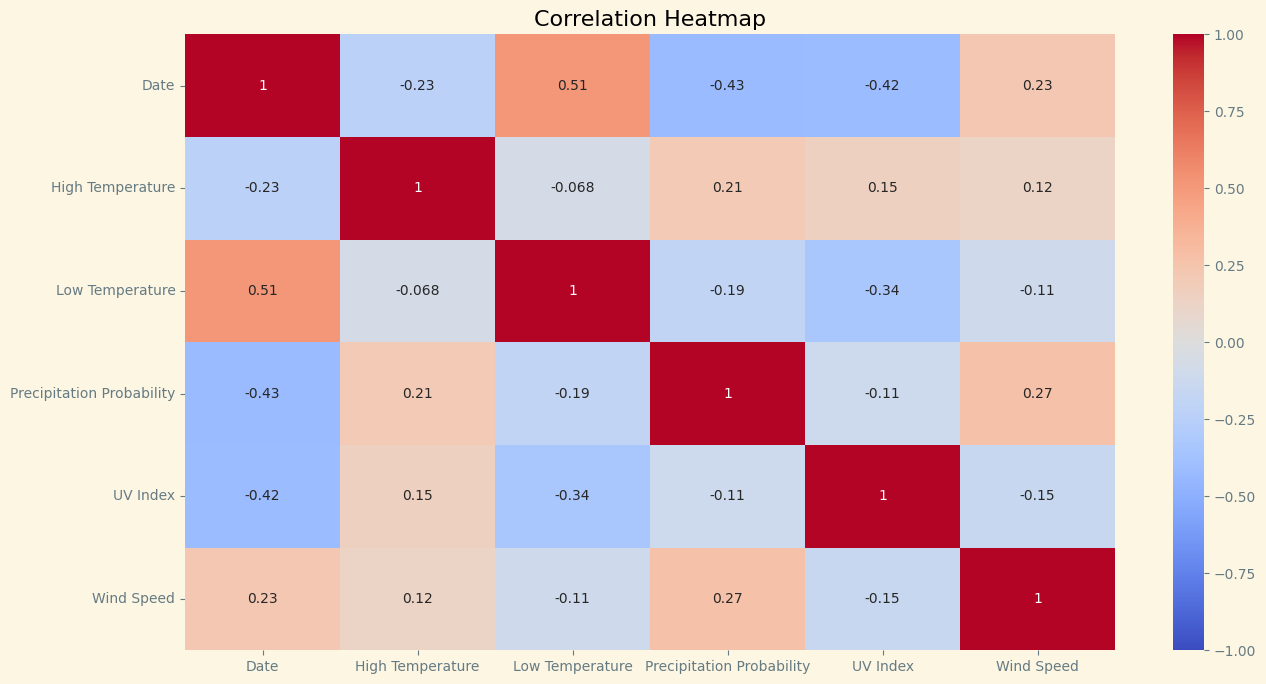

In [17]:
# Plot correlation heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')

plt.show()

In [19]:
# Calculate the average temperature
df['Average Temperature'] = (df['High Temperature'] + df['Low Temperature']) / 2

# Separate features and target variable. Target variable is 'Average Temperature'
X = df[['Date', 'Precipitation Probability', 'UV Index', 'Wind Speed']].copy()
y = df['Average Temperature']


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RF Regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                     Feature  Importance
0                       Date    0.631984
1  Precipitation Probability    0.172147
2                   UV Index    0.141877
3                 Wind Speed    0.053992


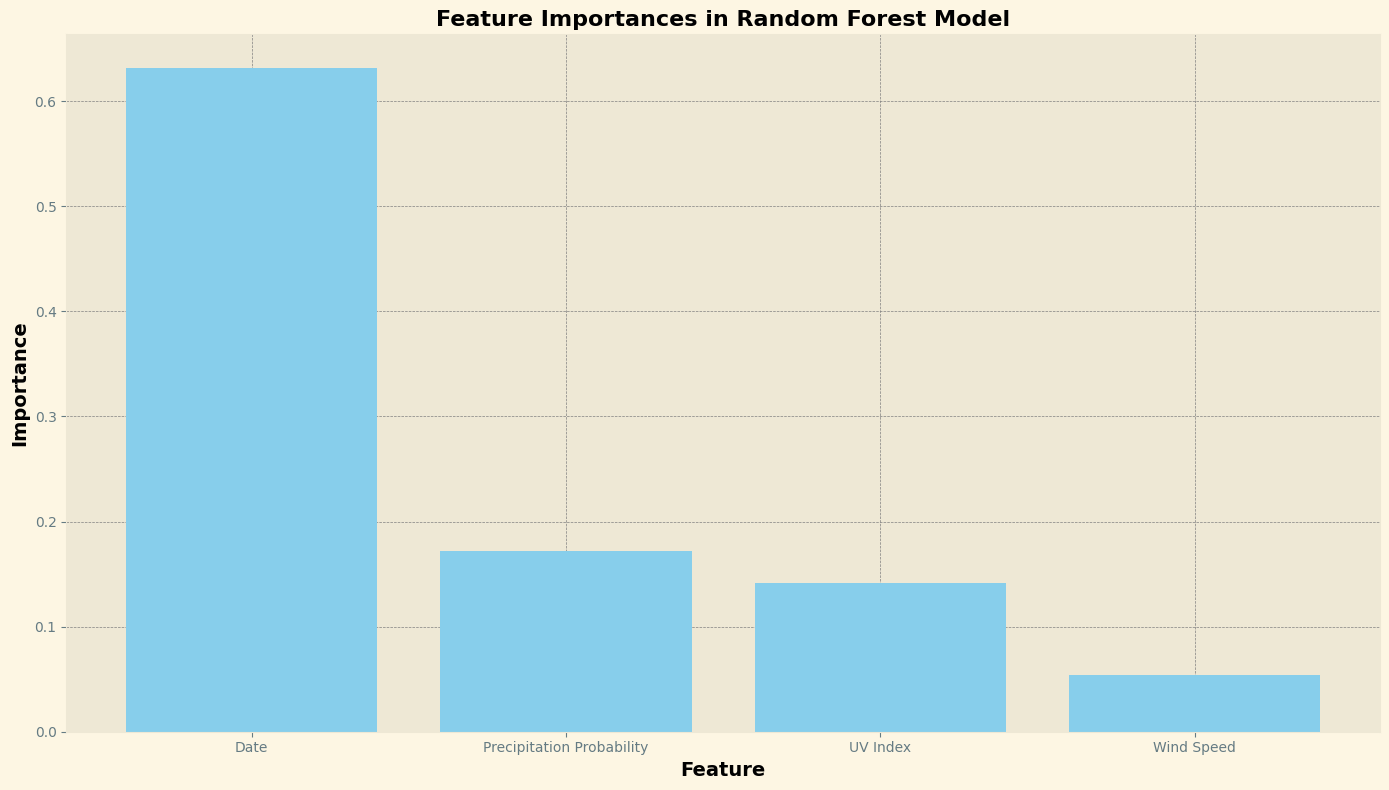

In [20]:
# Plot feature importances
plt.figure(figsize=(14, 8))
plt.style.use('Solarize_Light2')
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Importance', fontsize=14, fontweight='bold', color='black')
plt.title('Feature Importances in Random Forest Model', fontsize=16, fontweight='bold', color='black')
plt.grid(True, linestyle='--', color='grey', linewidth=0.5)
plt.tight_layout()
plt.show()